**a. Importing Required libraries**

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [107]:
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [108]:
#Test Data
test=pd.read_csv('test.csv')
print(test.shape)
test.head(2)

(10500, 14)


,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16


In [109]:
#Sample submission
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission.head()

,Property_ID,Habitability_score
0,0x21e3,71.98
1,0x68d4,71.20
2,0x7d81,71.39
3,0x7a57,31.46
4,0x9409,93.70


In [110]:
#Traun Data
train=pd.read_csv('train.csv')
print(train.shape)
train.head(2)

(39499, 15)


,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20


In [111]:
data=train.copy()

In [112]:
#Dropping the ID column as It wont reuired for predicting 
data.drop(columns='Property_ID',inplace=True)

In [113]:
#Checking for null values
data.isnull().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [114]:
data.dtypes

Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [115]:
#Except 'Number_of_Windows' column, 'Frequency_of_Powercuts',Furnishing','Crime_Rate','Dust_and_Noise' are strings 
# Numbers_of_Windows mode

In [116]:
for i in ['Number_of_Windows','Frequency_of_Powercuts','Furnishing','Crime_Rate','Dust_and_Noise']:
    print(data[i].unique())

[nan  2.  4.  3. 14.  5.  1. 13.  6.  7.  9. 15. 11. 12.  0.  8. 10.]
[ 0.  1.  2.  3. nan]
['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
['Medium' nan 'High' 'Low']


In [117]:
for i in ['Number_of_Windows','Frequency_of_Powercuts','Furnishing','Crime_Rate','Dust_and_Noise']:
    data[i].fillna(data[i].mode()[0], inplace=True)

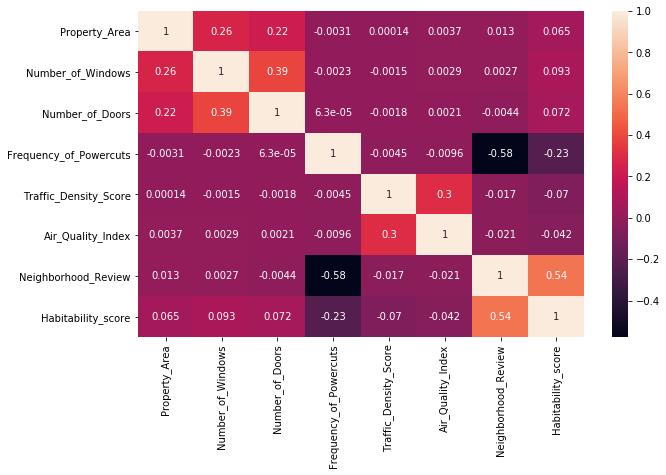

In [118]:
#Correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

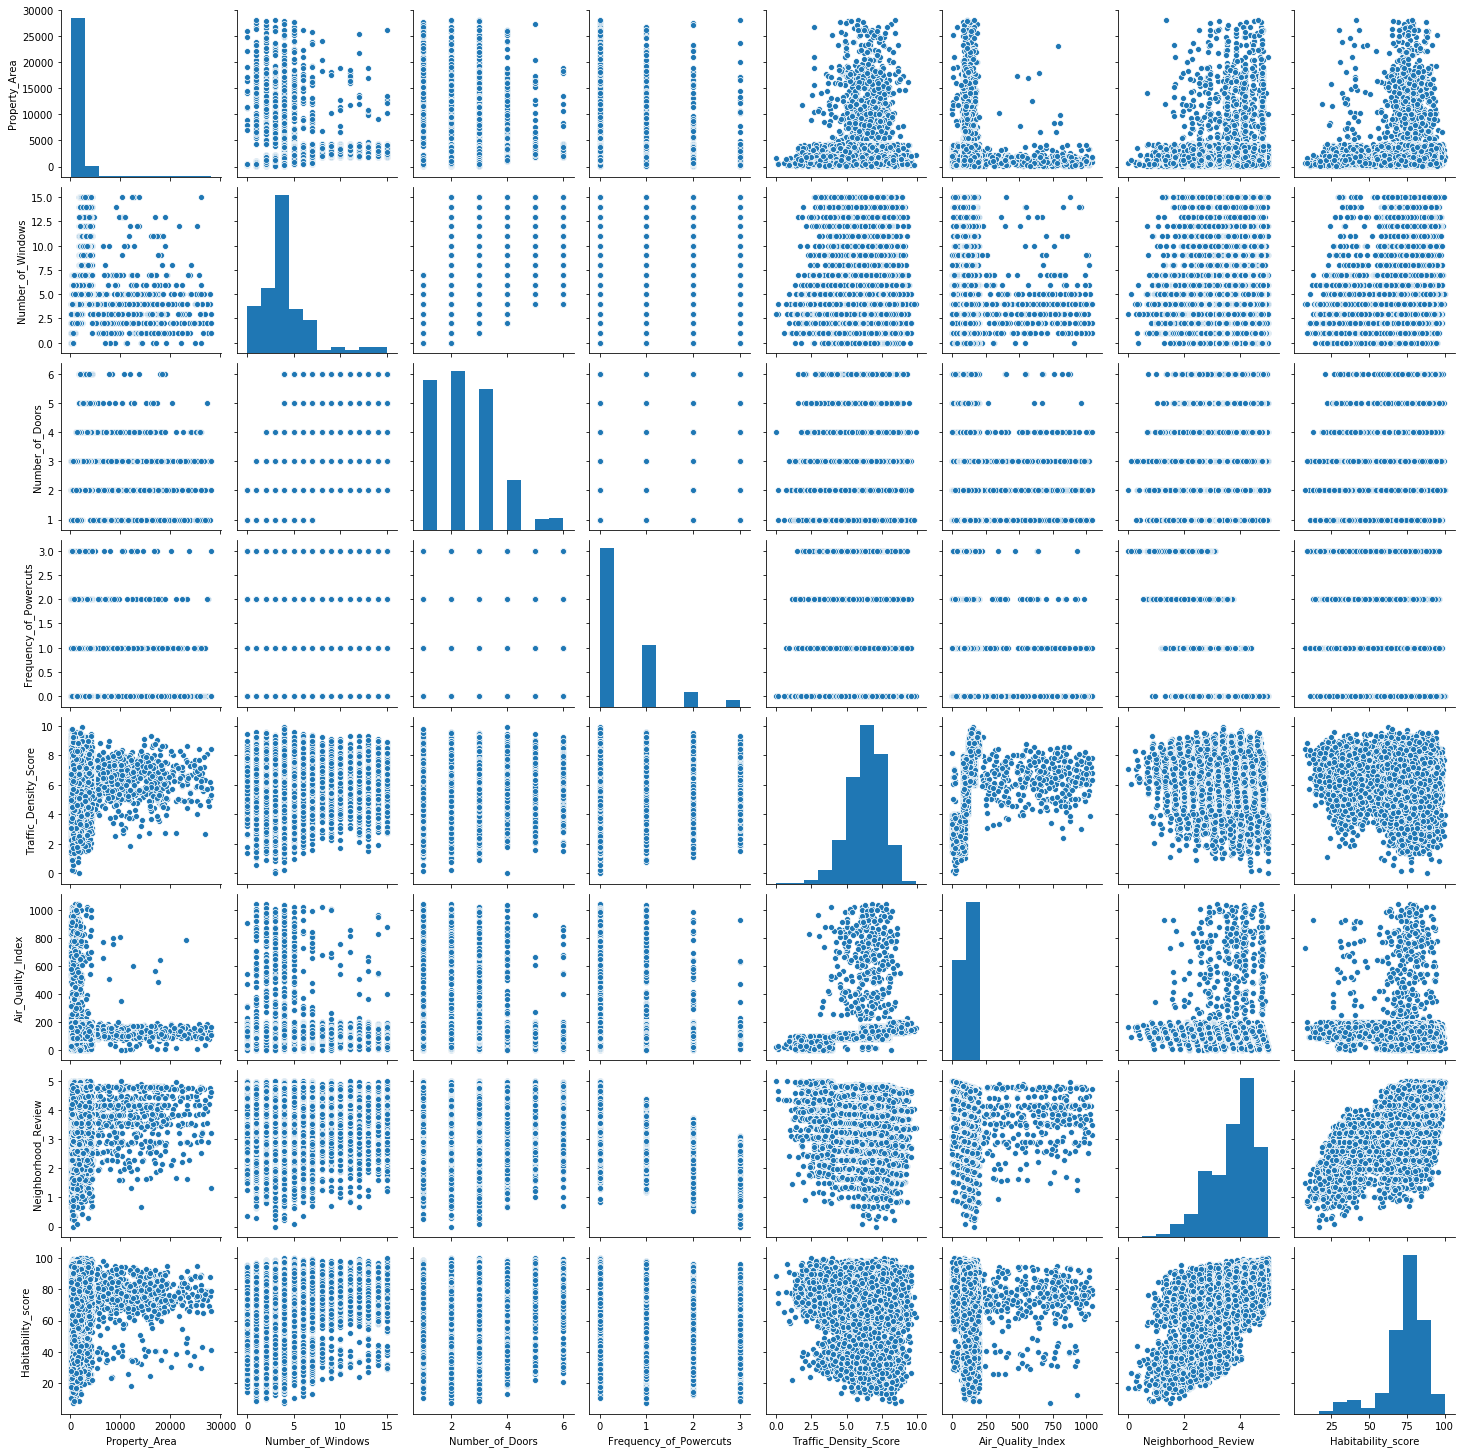

In [119]:
sns.pairplot(data)

In [15]:
#Habitability_score is highly positive correlated with Neighborhood_Review followed by negatively correlated with Frequency_of_Powercuts    

In [16]:
print(data.shape)
data.isnull().sum()

(39499, 14)


Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [17]:
string_columns=list(data.select_dtypes(include=['object']).columns)
print( 'String cols:',string_columns)

String cols: ['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise']


In [18]:
data.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.926960,2.331375,0.467708,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.634091,1.179964,0.744272,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [19]:
#Onehot encoder
data1=pd.get_dummies(data,columns=string_columns)

In [22]:
#train_test_split with onehot encoder 
X=np.array(data1.drop(columns='Habitability_score'))
y=data1['Habitability_score']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29624, 31)
(29624,)
(9875, 31)
(9875,)


In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [24]:
# One hot encoder 
models = []
models.append(('LR', LinearRegression()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor(random_state=0)))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGBR', XGBRegressor()))
print('with One hot encoded data')
for name, model in models:
    model.fit(X_train_scaled, y_train)
    print(name)
    print('Training Data r2score:',r2_score(y_train,model.predict(X_train_scaled)))
    print('Testing Data r2score:',r2_score(y_test,model.predict(X_test_scaled)))

with One hot encoded data
LR
Training Data r2score: 0.5944418857158242
Testing Data r2score: 0.5896279407539662
KNNR
Training Data r2score: 0.8315137337661341
Testing Data r2score: 0.7290756623536105
DTR
Training Data r2score: 1.0
Testing Data r2score: 0.6559794766950482
SVR
Training Data r2score: 0.7346797399893676
Testing Data r2score: 0.722714469912006
RFR
Training Data r2score: 0.975356639095771
Testing Data r2score: 0.8163578765730577
GBR
Training Data r2score: 0.7622594486345828
Testing Data r2score: 0.7516798285509808
XGBR
Training Data r2score: 0.8725118239107835
Testing Data r2score: 0.8035502802963762


In [28]:
## Finally selecting Random forest model with one hot encoded method
# One hot encoder 
RFR=RandomForestRegressor(random_state=0)
print(RFR.fit(X_train_scaled, y_train))

print('Training Data r2score:',r2_score(y_train,RFR.predict(X_train_scaled)))
print('Testing Data r2score:',r2_score(y_test,RFR.predict(X_test_scaled)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
Training Data r2score: 0.975356639095771
Testing Data r2score: 0.8163578765730577


In [ ]:
'max_depth':[13,14,15,16,17]
'n_estimators':[800,900,1000,1100]
'min_samples_leaf':[1,2,3]

In [55]:
params={'min_samples_split':[2,3,5]}

In [56]:
rf_grid=GridSearchCV(RandomForestRegressor(max_depth=13,min_samples_leaf=1,n_estimators=1000,random_state=0),param_grid=params,cv=2,verbose=4)
rf_grid.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. min_samples_split=2, score=0.816, total= 1.7min
[CV] min_samples_split=2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ................. min_samples_split=2, score=0.823, total= 1.7min
[CV] min_samples_split=3 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] ................. min_samples_split=3, score=0.816, total= 1.6min
[CV] min_samples_split=3 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.0min remaining:    0.0s


[CV] ................. min_samples_split=3, score=0.823, total= 1.6min
[CV] min_samples_split=5 .............................................
[CV] ................. min_samples_split=5, score=0.816, total= 1.6min
[CV] min_samples_split=5 .............................................
[CV] ................. min_samples_split=5, score=0.823, total= 1.7min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=13,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=N

In [57]:
rf_grid.best_params_

{'min_samples_split': 2}

In [58]:
rf_grid.best_score_

0.8192744516808078

#### Using the best score 

In [71]:
rf2=RandomForestRegressor(max_depth=15,n_estimators=500,min_samples_leaf=1,min_samples_split= 2,random_state=0)

In [72]:
rf2.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [73]:
y_pred_test=rf2.predict(X_test_scaled)
y_pred_train=rf2.predict(X_train_scaled)

In [74]:
print('accuracy of train data {:.2f}',r2_score(y_train,y_pred_train))
print('accuracy of test data {:.2f}',r2_score(y_test,y_pred_test))

accuracy of train data {:.2f} 0.9311942802990388
accuracy of test data {:.2f} 0.8216905834260613


### For Test Data

In [81]:
test_data=test.copy()

In [82]:
# # Dropping the ID column as It wont reuired for predicting 
# test_data.drop(columns='Property_ID',inplace=True)

In [83]:
#Checking for null values
test_data.isnull().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [84]:
#Except 'Number_of_Windows' column, 'Frequency_of_Powercuts',Furnishing','Crime_Rate','Dust_and_Noise' are strings 
# Numbers_of_Windows mode

In [87]:
for i in ['Number_of_Windows','Frequency_of_Powercuts','Furnishing','Crime_Rate','Dust_and_Noise']:
    test_data[i].fillna(data[i].mode()[0], inplace=True)

In [88]:
print(test_data.shape)
test_data.isnull().sum()

(10500, 14)


Property_ID               0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
dtype: int64

In [89]:
#Onehot encoder
test_data1=pd.get_dummies(test_data,columns=string_columns)

In [92]:
#Scaling
test_data1_scaled=scale.transform(test_data1.drop('Property_ID',axis=1))

In [93]:
pred=rf2.predict(test_data1_scaled)

In [95]:
test_data[['Property_ID']].shape

(10500, 1)

,Habitability_score
0,29.595315
1,80.855964
2,65.631919
3,73.162608
4,75.800443
...,...
10495,62.491327
10496,81.350075
10497,75.260526
10498,79.319844


In [103]:
result=pd.concat([test_data[['Property_ID']],pd.DataFrame(data=pred,columns=['Habitability_score'])],axis=1)

In [105]:
result.to_csv('final_Submissions.csv',index=False)